# Assignment - 32 - MACHINE LEARNING - 11
## By Prakash Ghosh
---

### Problem Statement:  Make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
---

#### Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

#### Hint:
Following is the command import packages and data<br><br>
from pandas import read_csv<br>
from pandas import datetime<br>
from matplotlib import pyplot<br>
from statsmodels.tsa.arima_model import ARIMA<br>
from sklearn.metrics import mean_squared_error<br>
def parser(x):<br>
return datetime.strptime('190'+x, '%Y-%m')<br>
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0,<br>
squeeze=True, date_parser=parser)

---

In [24]:
# Loading Libraries
import numpy as np
import pandas as pd
from pandas import read_csv, datetime

from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [10]:
# From the link https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line
# Data has been down loaded to the csv "shampoo-sales.csv"
FileName = "shampoo-sales.csv"

## parser function for parsing date into yyyy-mm-dd format 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
## create dataset 
series = read_csv(FileName, 
                  header=0, 
                  parse_dates=[0], 
                  index_col=0, 
                  squeeze=True, 
                  date_parser=parser)

In [11]:
series.head(10)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
Name: Sales of shampoo over a three year period, dtype: float64

#### Analyze Data

In [14]:
series.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [17]:
# Check Null
series.isnull().values.any()

False

In [18]:
# Check duplicate
series.duplicated().values.any()

False

#### Visualize Data

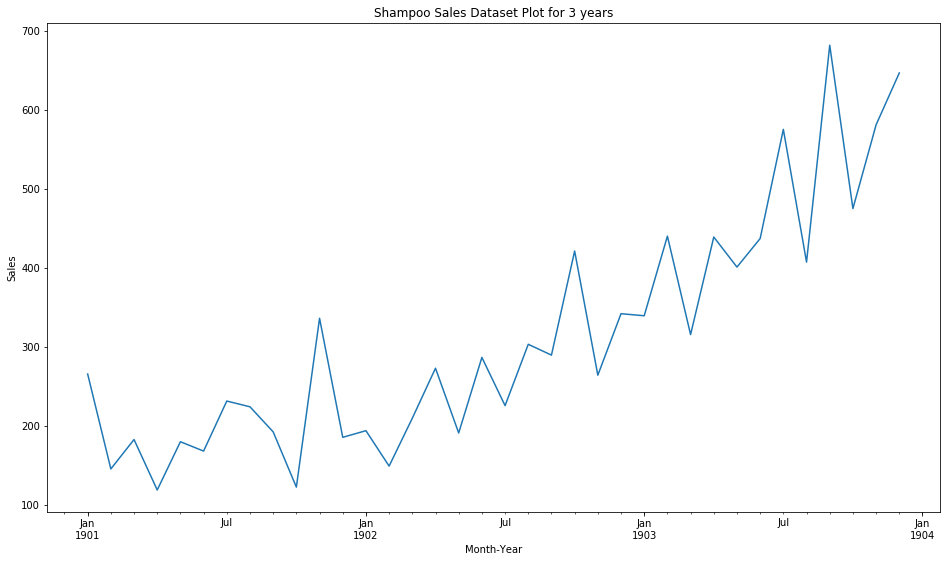

In [20]:
# Visualize Data in a graph
series.plot(figsize=(16,9))
pyplot.title('Shampoo Sales Dataset Plot for 3 years')
pyplot.xlabel('Month-Year')
pyplot.ylabel('Sales')
pyplot.show()

* <b>Observation-1 : Year on year increase of sales

#### Dicker-Fuller test
Check for whether mentioned time series data is stationary or non-stationary using rolling statistic

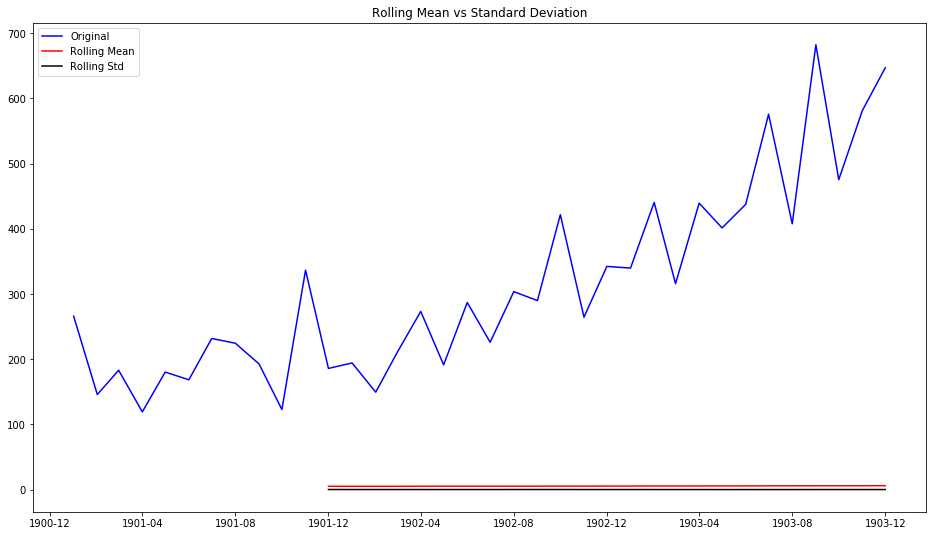

In [23]:
df_log = np.log(series)
rolling_mean = df_log.rolling(window=12).mean()
rolling_std = df_log.rolling(window=12).std()

pyplot.figure(figsize=(16,9))
original = pyplot.plot(series, color='blue',label='Original' )
mean = pyplot.plot(rolling_mean, color='red', label='Rolling Mean')
std = pyplot.plot(rolling_std, color='black', label = 'Rolling Std')

pyplot.legend(loc='best')
pyplot.title('Rolling Mean vs Standard Deviation')
pyplot.show(block=False)

* <b>Observation-2 : Difference between rolling mean and standard devaition with time indicates the series is non-stationary

* <b>Augmented dicker fuller test</b>

    Null Hypothesis:      The series has a unit root<br>
    Alternate Hypothesis: The series has no unit root.

In [33]:
adftest = adfuller(series, autolag='AIC')
adfoutput = pd.Series(adftest[0:4], 
                      index=['Test Statistic',
                             'p-value',
                             'Lags',
                             'Observation#'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Test Statistic           3.060142
p-value                  1.000000
Lags                    10.000000
Observation#            25.000000
Critical Value (1%)     -3.723863
Critical Value (5%)     -2.986489
Critical Value (10%)    -2.632800
dtype: float64


* <b>Observation-3 : Test statistics > Critical value indicates the series is not stationary

#### Correlation plot using statsmodel

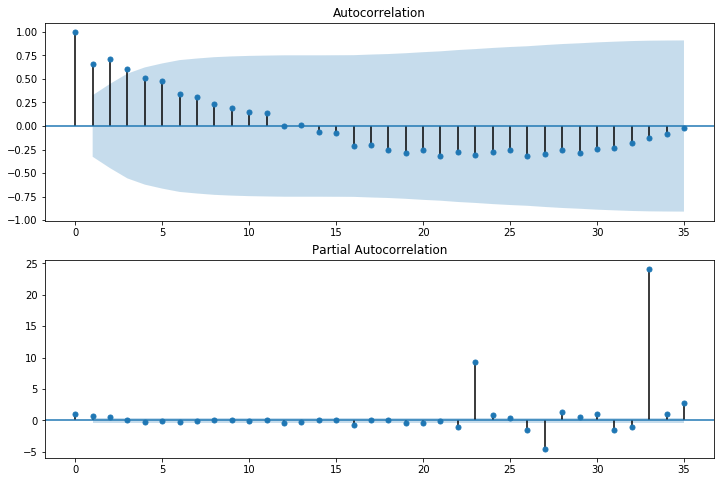

In [34]:
plot = pyplot.figure(figsize=(12,8))
ax1 = plot.add_subplot(211)
plot = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=35, ax=ax1)
ax2 = plot.add_subplot(212)
plot = sm.graphics.tsa.plot_pacf(series, lags=35, ax=ax2)

#### Autocorrelation Plot 

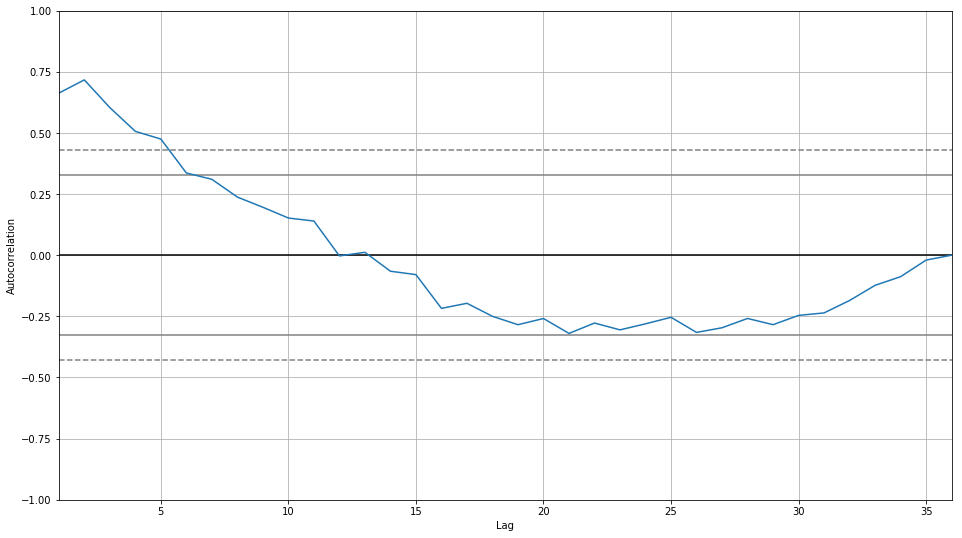

In [35]:
pyplot.figure(figsize=(16,9))
autocorrelation_plot(series)
pyplot.show()

* <b>Observation-4 : Positive correlation with the first 12 lags(approx). Choose starting point for the AR parameter of the model at 5.

#### ARIMA Modelling on time series data
ARIMA(p,d,q) where 

p: Lag order.

d: Degree of differencing.

q: Order of moving average.

In [82]:
# Intialize ARIMA model
p=5  # lag order
d=1  # take moving average
q=0  # take moving average
arima_model = ARIMA(series , order=(p,d,q))

In [83]:
# fit the model
arima_model_fit = arima_model.fit(disp=0)

In [84]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          ARIMA Model Results                                          
=======================================================================================================
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 30 Dec 2018   AIC                            406.340
Time:                                                 21:13:37   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales of shampoo over a three year period    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales of shampoo over a three year period    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales of shampoo over a three year period    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales of shampoo over a three year period    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales of shampoo over a three year period     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

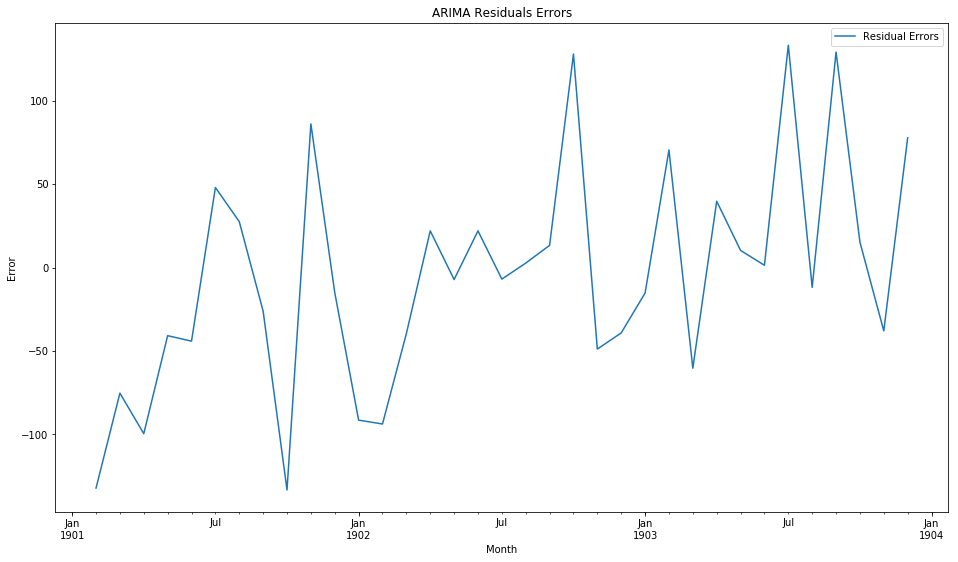

In [85]:
# Plots residual errors 
arima_residuals = pd.DataFrame(arima_model_fit.resid , columns=['Residual Errors'])
arima_residuals.plot(figsize=(16,9))
pyplot.ylabel("Error")
pyplot.title('ARIMA Residuals Errors')
pyplot.show()

In [86]:
arima_residuals.describe()

,Residual Errors
count,35.000000
mean,-5.495218
std,68.132882
min,-133.296637
25%,-42.477890
50%,-7.186512
75%,24.748330
max,133.237936


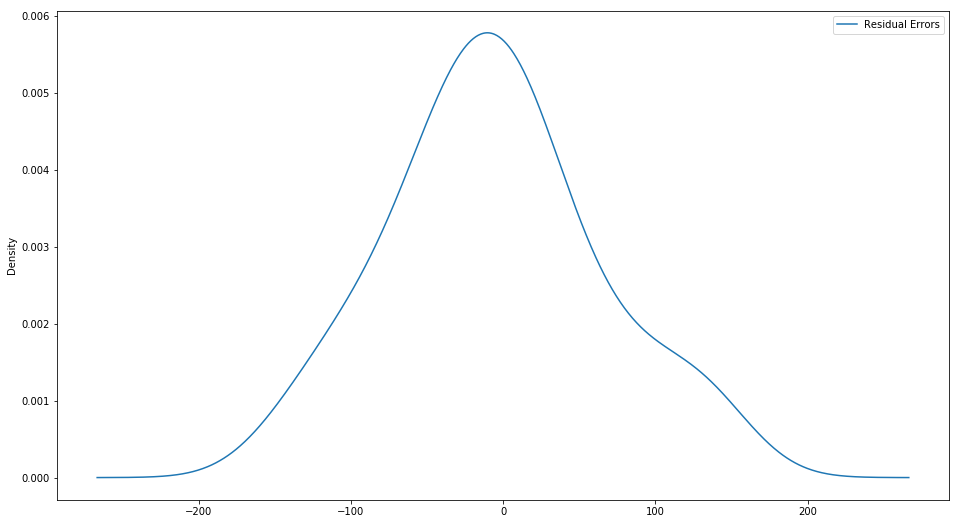

In [87]:
# Density Plot of the residual error values
arima_residuals.plot(kind='kde',figsize=(16,9))
pyplot.show()

#### Evaluate the ARIMA Model


In [135]:
train_set_len = int(len(series.values) * 0.7)
train, test = series.values[0:train_set_len], series.values[train_set_len:len(series.values)]

list_train = list(train)
list_predictions = list()

for i in range(len(test)):
    model = ARIMA(list_train, order=(p,d,q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    list_predictions.append(output[0])
    list_train.append(test[i])
    print('Predicted=%f, Actual=%f' % (output[0], test[i]))

Predicted=387.376449, Actual=440.400000
Predicted=348.154255, Actual=315.900000
Predicted=386.308818, Actual=439.300000
Predicted=356.082087, Actual=401.300000
Predicted=446.379462, Actual=437.400000
Predicted=394.737224, Actual=575.500000
Predicted=434.915402, Actual=407.600000
Predicted=507.923547, Actual=682.000000
Predicted=435.482779, Actual=475.300000
Predicted=652.743826, Actual=581.300000
Predicted=546.343519, Actual=646.900000


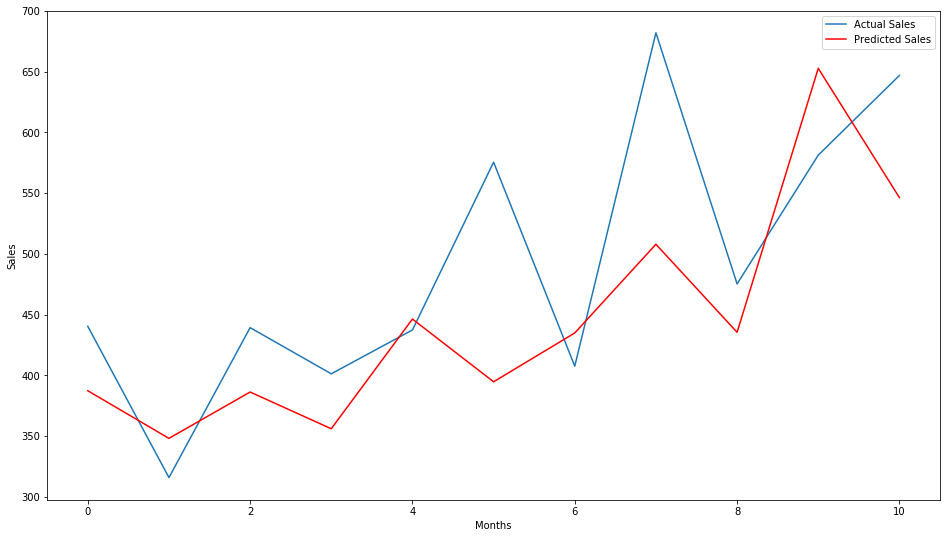

In [136]:
pyplot.figure(figsize=(16,9))
pyplot.plot(test , label='Actual Sales')
pyplot.plot(list_predictions, color='red' , label='Predicted Sales')
pyplot.legend(loc='best')
pyplot.xlabel("Months")
pyplot.ylabel("Sales")
pyplot.show()